<center> <h1> HyIPO: Hyped Initial Product Offerings </h1> </center>
<center> <h2> Notebook: Data Acquisition and Feature Engineering </h2> </center>

<p><strong>Goal:</strong> data acquisition and understanding 

- data sources and formats 
- features extraction
- cleaning and wrangling 
 
The approach consists in using domain knowledge and extracting relevant features to improve the quality of results from the machine learning process.

My target variable is label 1 if the 1st-day change in price after the IPO date is higher than the risk-free rate benchmark (5-year Treasury bill rate) and label 0 otherwise.

The first step is to find a reliable source of historical data regarding IPOs. I used the dataset provided by the IPOScoop website (https://www.iposcoop.com/scoop-track-record-from-2000-to-present/) which includes information about the Issuer, Symbol, Rating, IPO date, IPO price, the 1st-day returns and the IPO managers for the period 2000-2020 ("the IPOs list" - 3633 observations). 

For each issuer in the dataset, I executed the following steps in this notebook:
- data cleaning: standard procedures (changing data types, checking whether NaN's and/or Null values exist, dropping useless columns, etc.) plus checking and replacing the issuers' trading symbols in the IPO list with the accurate ones from a dataset which captures the US Publicly Listed Companies as of today (https://stockanalysis.com/) 
- feature engineering and extraction:

•	the 1st-week and 1st-month closing prices subsequent to the IPO (Yahoo Finance) for each issuer in the IPO list 

•	market performance indicator: the S&P500 change in closing prices for 1 week, 1 month and 3 months prior to the IPO date (Yahoo Finance)

•	market volatility indicator: the VIX change in closing prices for 1 week, 1 month and 3 months prior to the IPO date (Yahoo Finance)

•	AAII Investor Sentiment Survey (https://www.aaii.com/sentimentsurvey/sent_results) published during the week prior to the IPO date 

•	label 1 if the Lead/Joint-Lead Managers are Tier 1 underwriters or 0 otherwise

•	date-based features (day of the week)

•	5-year Treasury bill historical rate for each IPO date

## Loading Packages

In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=5ba9f21f02dcf8425fd02b859682f7a360d441e8f19d45296c75f4f30ea3251b
  Stored in directory: /root/.cache/pip/wheels/4b

In [ ]:
pip install html-table-parser-python3

In [ ]:
pip install requests-html

     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 111 kB 31.5 MB/s 
     |████████████████████████████████| 138 kB 63.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=8ad59b1872c0eaa0eff45a9dcc753385aaea81cebbd64792a436a034653aecfe
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=95ebc213812e9b3d2f1daf90399f923247091bfacbad03dfb139e18cbb1f1b92
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are ins

In [ ]:
pip install nb_black

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 96 kB 7.2 MB/s 
     |████████████████████████████████| 843 kB 44.1 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=c9446572b4e86dce3386ac4c266b9b4fd6ccb9fc359cb8aa4952d0ef152a03b0
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.2 which is incompatible.


In [ ]:
# Import all the necessary packages
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import statistics
import warnings
warnings.filterwarnings('ignore')

from google.colab import files


from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, f1_score, accuracy_score,r2_score)
from sklearn.metrics import precision_recall_fscore_support, mutual_info_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

import datetime
from pandas.tseries.offsets import *

import requests

from urllib.error import HTTPError
from requests_html import HTMLSession

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Necessary Functions for this Notebook

In [ ]:
# FUNCTION --> # Shows you a report with the main info of each column from data frame
def df_main_insights(data_frame):
    print("\nThis data frame have the following shape: ", data_frame.shape)
    for col_name in data_frame.columns:
        print(
            "\nThe column:",
            '"',
            col_name,
            '"',
            "corresponds to index:",
            '"',
            data_frame.columns.get_loc(col_name),
            '"',
            "contains this amount of unique values inside:",
            '"',
            len(data_frame[col_name].unique()),
            '"',
            "contain this type of data:",
            data_frame[col_name].dtypes,
            '"',
        )

In [ ]:
# FUNCTION --> # Identifies all unique values for all df columns
def df_identification_of_unique_values_per_column(data_frame):
    # variable to hold the count
    cnt = 0
    # list to hold visited values
    visited = []
    for col_name in data_frame.columns:
        # Listing all unique values that exist in the specified colum of the data frame
        print(
            "\nColumn name:",
            col_name,
            "have these unique data elements:\n\n",
            '"',
            data_frame[col_name].unique(),
            '"',
        )

In [ ]:
# FUNCTION --> # Shows you (if applies) in which colums you already have NaN and/or Null values
def df_check_of_NaNs_and_Nulls(data_frame):
    print(
        "\nYour dataframe NaN content is:\t\n\n", data_frame.isna().values.any(), "\n"
    )
    print(
        "\nYour dataframe Null content is:\t\n\n",
        data_frame.isnull().values.any(),
        "\n",
    )

In [ ]:
# FUNCTION --> # Shows you if the input date is on a business day or not
from pandas.tseries.offsets import BDay

bdays=BDay()

def is_business_day(date):
  return date == date + 0*bdays

In [ ]:
def get_cik(ticker):
    print(f'Getting CIK code for {ticker}')

    cik_code = ""

    try:
        url = f'https://sec.report/Ticker/{ticker}'
        print(url)
        r = requests.get(url, timeout=60)
        print(r)

        cik_text = r.html.xpath('/html/body/div[1]/div/h2[1]')[0].text
        cik_code = cik_text.split(' ')[2]
        cik_code_numbers = filter(str.isdigit, cik_code)
        cik_code = "".join(cik_code_numbers)

        print(f'{ticker} CIK: {cik_code}')
    except HTTPError as err:
        print(f'Requesting {ticker}: {err}')
    except:
        print(f'Couldn\'t get CIK for {ticker}')
    
    return cik_code

## Data Loading

### List of IPOs

In [ ]:
!gdown --id 1Vkx4ccXimEg5OaoREGSPKi2hilawUP_p

Downloading...
From: https://drive.google.com/uc?id=1Vkx4ccXimEg5OaoREGSPKi2hilawUP_p
To: /content/SCOOP-Rating-Performance file.zip
100% 508k/508k [00:00<00:00, 94.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/SCOOP-Rating-Performance file.zip'

with ZipFile(file_name, 'r') as zipi:
  zipi.extractall()
  print('Done')

Done


In [ ]:
df = pd.read_excel('/content/SCOOP-Rating-Performance file.xlsx')

In [ ]:
df.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,NaN
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,NaN
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,NaN
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,NaN
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,NaN


### US Publicly Listed Companies

In [ ]:
!gdown --id 1VeZ57_5fZATFrbw2nSD6Y8-Te_HmtCkr

Downloading...
From: https://drive.google.com/uc?id=1VeZ57_5fZATFrbw2nSD6Y8-Te_HmtCkr
To: /content/stocks-list.zip
100% 112k/112k [00:00<00:00, 62.6MB/s]


In [ ]:
# Import an external dataset with listed stocks on US market
# Check and replace the issuers' symbols in the SCOOP file with the correct/ updated values

from zipfile import ZipFile
file_name = '/content/stocks-list.zip'

with ZipFile(file_name, 'r') as zipi:
  zipi.extractall()
  print('Done')

Done


In [ ]:
stocks_list = pd.read_csv('/content/stocks-list.csv')

In [ ]:
stocks_list.head()

,Symbol,Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,3.971395e+10
1,AA,Alcoa,Metals & Mining,1.660342e+10
2,AAC,Ares Acquisition,Blank Check / SPAC,1.471500e+09
3,AACG,ATA Creativity Global,Diversified Consumer Services,4.643781e+07
4,AACI,Armada Acquisition I,Blank Check / SPAC,2.033673e+08


### AAII Investor Sentiment Survey

In [ ]:
!gdown --id 1IPkC6mfLCcnKBB-PfTqF_dOD6hDHe4nl

Downloading...
From: https://drive.google.com/uc?id=1IPkC6mfLCcnKBB-PfTqF_dOD6hDHe4nl
To: /content/Sentiment Survey.zip
100% 62.2k/62.2k [00:00<00:00, 50.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/Sentiment Survey.zip'

with ZipFile(file_name, 'r') as zipi:
  zipi.extractall()
  print('Done')

Done


In [ ]:
sentiment = pd.read_excel('/content/Sentiment Survey.xlsx')

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trade Date                3633 non-null   object 
 1   Issuer                    3633 non-null   object 
 2   Symbol                    3633 non-null   object 
 3   Lead/Joint-Lead Managers  3633 non-null   object 
 4   Offer Price               3633 non-null   float64
 5   Opening Price             3633 non-null   float64
 6   1st Day Close             3633 non-null   float64
 7   1st Day % Px Chng         3632 non-null   float64
 8   $ Change Opening          3633 non-null   float64
 9   $ Change Close            3633 non-null   float64
 10  Star Ratings              3633 non-null   object 
 11  Performed                 407 non-null    object 
dtypes: float64(6), object(6)
memory usage: 340.7+ KB


In [ ]:
# Dropping useless columns:
df = df.drop(axis=1, columns='Performed')

In [ ]:
df['Symbol'] = df['Symbol'].str.split('/').str[0].astype(str)

In [ ]:
# Checking whether NaN's and/or Null values exist
df = df.replace(" ", np.nan)
df_check_of_NaNs_and_Nulls(df)


Your dataframe NaN content is:	

 True 


Your dataframe Null content is:	

 True 



In [ ]:
df.dropna(inplace=True)

In [ ]:
# Checking whether duplicated values exist
df.duplicated(keep=False).sum()

0

In [ ]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 0 to 3632
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trade Date                3632 non-null   object 
 1   Issuer                    3632 non-null   object 
 2   Symbol                    3632 non-null   object 
 3   Lead/Joint-Lead Managers  3632 non-null   object 
 4   Offer Price               3632 non-null   float64
 5   Opening Price             3632 non-null   float64
 6   1st Day Close             3632 non-null   float64
 7   1st Day % Px Chng         3632 non-null   float64
 8   $ Change Opening          3632 non-null   float64
 9   $ Change Close            3632 non-null   float64
 10  Star Ratings              3632 non-null   object 
dtypes: float64(6), object(5)
memory usage: 340.5+ KB


In [ ]:
import csv
import time

def search(search_string):
  with open('stocks-list.csv') as f:
    reader = csv.reader(f)
    s = search_string
    next(reader, None) # discard the header
    for row in reader:
        if (search_string in row[1]) or (row[1] in search_string):
            s = row[0]
            break
    return s    

In [ ]:
df['Symbol2'] = df['Issuer'].apply(search)

In [ ]:
df['Symbol3'] = np.where((df['Symbol2'] != df['Issuer']), df['Symbol2'], df['Symbol'])

In [ ]:
df.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Symbol2,Symbol3
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2,IMAB,IMAB
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1,LIZHI,LIZI
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1,Phoenix Tree Holdings Ltd.,DNK
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1,VEL,VEL
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1,Gores Holdings IV,GHIVU


## Feature engineering

### Add date-based features

In [ ]:
df['Date'] = pd.to_datetime(df['Trade Date'], errors='coerce')
df.dropna(axis=0, subset=['Date'], inplace=True)
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))
date = df['Date'].str.split('-', expand =True)

df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df['weekday'] = df['Trade Date'].apply(lambda x: x.weekday())

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [ ]:
df['weekday'].value_counts()

3    1196
4     914
2     874
1     472
0     170
5       4
6       1
Name: weekday, dtype: int64

In [ ]:
calendar.weekday()

4

### Add 1st week and 1st month closing prices after the IPO date

In [ ]:
stocks = df['Symbol3'].to_list()
start_date_y = df['year'].to_list()
start_date_m = df['month'].to_list()
start_date_d = df['day'].to_list()

In [ ]:
from pandas.tseries.offsets import *

price1w = []
price1m = []
sector = []

for i in range(0, len(stocks)):
  # start = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  # end = start + datetime.timedelta(days=2)

  price2 = 0 
  price3 = 0

  try:
    s = yf.Ticker(stocks[i]) 
    hist = s.history(period="max")
    price2 = hist.iloc[7, 3]
    price3 = hist.iloc[30, 3]

  except:
    print('error')  

  price1w.append(price2)
  price1m.append(price3)

- DNK: No data found, symbol may be delisted
error
- GHIVU: No data found, symbol may be delisted
error
- IPV.U: No data found, symbol may be delisted
error
- CSPR: No data found, symbol may be delisted
error
- PPD: No data found, symbol may be delisted
error
- CCAC.U: No data found, symbol may be delisted
error
- ZGYHU: No data found, symbol may be delisted
error
- CCXX.U: No data found, symbol may be delisted
error
- NBACU: No data found, symbol may be delisted
error
- DMYT.U: No data found, symbol may be delisted
error
- FEAC.U: No data found, symbol may be delisted
error
- LSACU: No data found, symbol may be delisted
error
- DFPHU: No data found, symbol may be delisted
error
- IPOC.U: No data found, symbol may be delisted
error
- PCPL.U: No data found, symbol may be delisted
error
- CHAQ.U: No data found, symbol may be delisted
error
- IPOB.U: No data found, symbol may be delisted
error
- FVAC.U: No data found, symbol may be delisted
error
- CGROU: No data found, symbol may be deli

In [ ]:
df['price1w'] = price1w
df['price1m'] = price1m

In [ ]:
df['1st Week % Px Chng'] = df['price1w']/df['Offer Price'] - 1
df['1st Month % Px Chng'] = df['price1m']/df['Offer Price'] - 1

In [ ]:
# ss = s.info['sector']

In [ ]:
df[df['1st Week % Px Chng'] != -1].shape

(1878, 21)

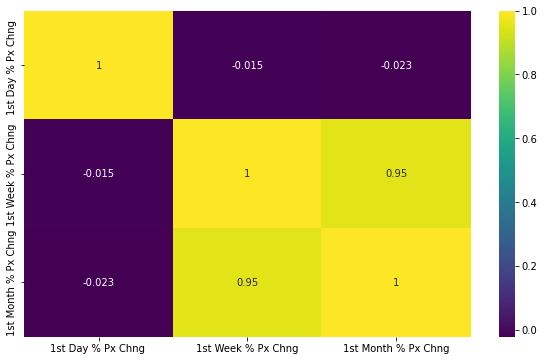

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(df[['1st Day % Px Chng ','1st Week % Px Chng', '1st Month % Px Chng' ]][df['1st Week % Px Chng'] != -1].corr(), annot=True, cmap="viridis")

### Add 1 week, 1 month and 3 months S&P 500 closing prices prior to the IPO date

In [ ]:
sp = yf.Ticker('^GSPC') 
hist = sp.history(period="max")

In [ ]:
stocks = df['Symbol3'].to_list()
start_date_y = df['year'].to_list()
start_date_m = df['month'].to_list()
start_date_d = df['day'].to_list()

In [ ]:
df.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,Symbol2,Symbol3,Date,year,month,day,price1w,price1m,1st Week % Px Chng,1st Month % Px Chng
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,...,IMAB,IMAB,2020-01-17,2020,1,17,13.43,13.10,-0.040714,-0.064286
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,...,LIZHI,LIZI,2020-01-17,2020,1,17,11.00,9.31,0.000000,-0.153636
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,...,Phoenix Tree Holdings Ltd.,DNK,2020-01-17,2020,1,17,0.00,0.00,-1.000000,-1.000000
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,...,VEL,VEL,2020-01-17,2020,1,17,14.12,13.84,0.086154,0.064615
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,...,Gores Holdings IV,GHIVU,2020-01-24,2020,1,24,0.00,0.00,-1.000000,-1.000000


In [ ]:
from pandas.tseries.offsets import *

price1ws = []
price1wc = []

price1ms = []
price1mc = []

price3ms = []
price3mc = []

for i in range(0, len(stocks)):
  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=7))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  index = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  price1ws.append(price1)
  price1wc.append(price2)

  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=30))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  index = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  price1ms.append(price1)
  price1mc.append(price2)

  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=90))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  i = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  
  price3ms.append(price1)
  price3mc.append(price2)

In [ ]:
df['priceSP1ws'] = price1ws
df['priceSP1wc'] = price1wc
df['priceSP1ms'] = price1ms
df['priceSP1mc'] = price1mc
df['priceSP3ms'] = price3ms
df['priceSP3mc'] = price3mc

In [ ]:
df['S&P 1 Week % Px Chng'] = df['priceSP1wc']/df['priceSP1ws'] - 1
df['S&P 1 Month % Px Chng'] = df['priceSP1mc']/df['priceSP1ms'] - 1
df['S&P 3 Months % Px Chng'] = df['priceSP3mc']/df['priceSP3ms'] - 1

In [ ]:
df.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,1st Month % Px Chng,priceSP1ws,priceSP1wc,priceSP1ms,priceSP1mc,priceSP3ms,priceSP3mc,S&P 1 Week % Px Chng,S&P 1 Month % Px Chng,S&P 3 Months % Px Chng
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,...,-0.064286,3253.050049,3329.620117,3112.76001,3329.620117,2979.389893,3329.620117,0.023538,0.069668,0.117551
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,...,-0.153636,3253.050049,3329.620117,3112.76001,3329.620117,2979.389893,3329.620117,0.023538,0.069668,0.117551
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,...,-1.000000,3253.050049,3329.620117,3112.76001,3329.620117,2979.389893,3329.620117,0.023538,0.069668,0.117551
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,...,0.064615,3253.050049,3329.620117,3112.76001,3329.620117,2979.389893,3329.620117,0.023538,0.069668,0.117551
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,...,-1.000000,3283.149902,3295.469971,3132.52002,3295.469971,2997.959961,3295.469971,0.003753,0.052019,0.099237


### Add 1 week, 1 month and 3 months VIX (CBOE Volatility Index) closing values prior to the IPO date


In [ ]:
vix = yf.Ticker('^VIX') 
hist = vix.history(period="max")

In [ ]:
price1ws = []
price1wc = []

price1ms = []
price1mc = []

price3ms = []
price3mc = []

for i in range(0, len(stocks)):
  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=7))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  index = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  price1ws.append(price1)
  price1wc.append(price2)

  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=30))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  index = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  price1ms.append(price1)
  price1mc.append(price2)

  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=90))
  start = start.date()
  s = datetime.datetime(start.year, start.month, start.day)  
  dif = end - s
  dif = pd.to_timedelta([dif]).astype('timedelta64[h]')[0]/24
  dif = int(dif)
  i = hist.index.get_loc(end)
  price1 = hist.iloc[index-dif, 3]
  price2 = hist.iloc[index, 3]

  
  price3ms.append(price1)
  price3mc.append(price2)
    

In [ ]:
df['priceVIX1ws'] = price1ws
df['priceVIX1wc'] = price1wc
df['priceVIX1ms'] = price1ms
df['priceVIX1mc'] = price1mc
df['priceVIX3ms'] = price3ms
df['priceVIX3mc'] = price3mc

In [ ]:
df['VIX 1 Week % Px Chng'] = df['priceVIX1wc']/df['priceVIX1ws'] - 1
df['VIX 1 Month % Px Chng'] = df['priceVIX1mc']/df['priceVIX1ms'] - 1
df['VIX 3 Months % Px Chng'] = df['priceVIX3mc']/df['priceVIX3ms'] - 1

In [ ]:
df.head()

### Add Treasury Yield 5 Years (^FVX) at the IPO date

In [ ]:
tyield = yf.Ticker('^FVX') 
hist = tyield.history(period="max")

In [ ]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-29,2.606,2.606,2.478,2.485,0,0,0
2022-03-30,2.487,2.525,2.432,2.448,0,0,0
2022-03-31,2.408,2.445,2.393,2.422,0,0,0
2022-04-01,2.532,2.594,2.513,2.549,0,0,0
2022-04-04,2.549,2.584,2.523,2.555,0,0,0


In [ ]:
price = []

for i in range(0, len(stocks)):
  end = datetime.datetime(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)

  price2 = 0

  try:
    index = hist.index.get_loc(end)

    price2 = hist.iloc[index, 3]
  except:
    print('error')   

  price.append(price2)

error


In [ ]:
df['tyield'] = price

In [ ]:
df['tyield'] = df['tyield']/100

### Add AII Investor Sentiment Survey value (bull-bear spread) published during the week prior to IPO date

In [ ]:
stocks = df['Symbol3'].to_list()
start_date_y = df['year'].to_list()
start_date_m = df['month'].to_list()
start_date_d = df['day'].to_list()

In [ ]:
from pandas.tseries.offsets import *
from pandas.tseries.offsets import BDay

price = []


for i in range(0, len(stocks)):
  end = datetime.date(start_date_y[i], start_date_m[i], start_date_d[i])  
  if is_business_day(end) == False:
    end = end + datetime.timedelta(days=2)
  start = (end - datetime.timedelta(days=7))
  # start = start.date()
  s = datetime.date(start.year, start.month, start.day)  
  avg_sentiment = sentiment[sentiment['Date'].between(s.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d"), inclusive=True)]['Bull-Bear Spread'].mean()
  price.append(avg_sentiment)

In [ ]:
df['Sentiment_survey'] = price

In [ ]:
df.shape

(3631, 40)

### Add Lead/Joint-Lead Managers rating 
https://markets.ft.com/data/league-tables/tables-and-trends/mergers-and-acquisitions

In [ ]:
top = ['goldman sachs', 'credit suisse', 'jp morgan', 'j.p. morgan', 'citi', 'morgan stanley', 'bank of america', 'citigroup']

In [ ]:
index = []

for i in range(0, len(stocks)):
  text = df['Lead/Joint-Lead Managers'].iloc[i].lower()
  text = text.split('/')
  text = [x.strip(' ') for x in text]
  if any(ext in text for ext in top):
    index.append(1)
  else:
    index.append(0)  

In [ ]:
df['Top IB'] = index

In [ ]:
df['Top IB'].sum()

1774

In [ ]:
df.head()

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,priceVIX1mc,priceVIX3ms,priceVIX3mc,VIX 1 Week % Px Chng,VIX 1 Month % Px Chng,VIX 3 Months % Px Chng,Sentiment_survey,Top IB,weekday,tyield
0,2020-01-17 00:00:00,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,...,12.10,15.20,12.10,-0.100372,-0.182432,-0.203947,0.143266,0,4,0.01631
1,2020-01-17 00:00:00,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,...,12.10,15.20,12.10,-0.100372,-0.182432,-0.203947,0.143266,1,4,0.01631
2,2020-01-17 00:00:00,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,...,12.10,15.20,12.10,-0.100372,-0.182432,-0.203947,0.143266,1,4,0.01631
3,2020-01-17 00:00:00,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,...,12.10,15.20,12.10,-0.100372,-0.182432,-0.203947,0.143266,1,4,0.01631
4,2020-01-24 00:00:00,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,...,14.56,14.67,14.56,0.175141,-0.071429,-0.007498,0.208334,0,4,0.01501


## Exporting the new data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv('/content/drive/My Drive/IPO_Project/data/processed_data/final_data_with_features.csv') 